# Engineering Students Placements Prediction with Supervised models

This project aim to utilize different kinds of machine learning supervised model to predict whether students get placement or not. The models also help identify what features impact the prediction the most.

Data provided by Kaggle (https://www.kaggle.com/datasets/tejashvi14/engineering-placements-prediction)

### Import packages

In [1]:
import pandas as pd
import pyrsm as rsm
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv("data/collegePlace.csv")

### EAD

In [4]:
df.head(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
df.shape

(2966, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
df['Gender'] = df['Gender'].astype("category")
df['Stream'] = df['Stream'].astype("category")

In [8]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

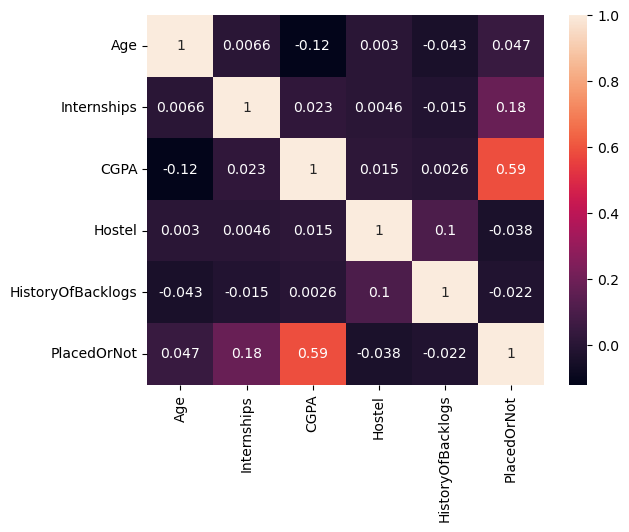

In [48]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

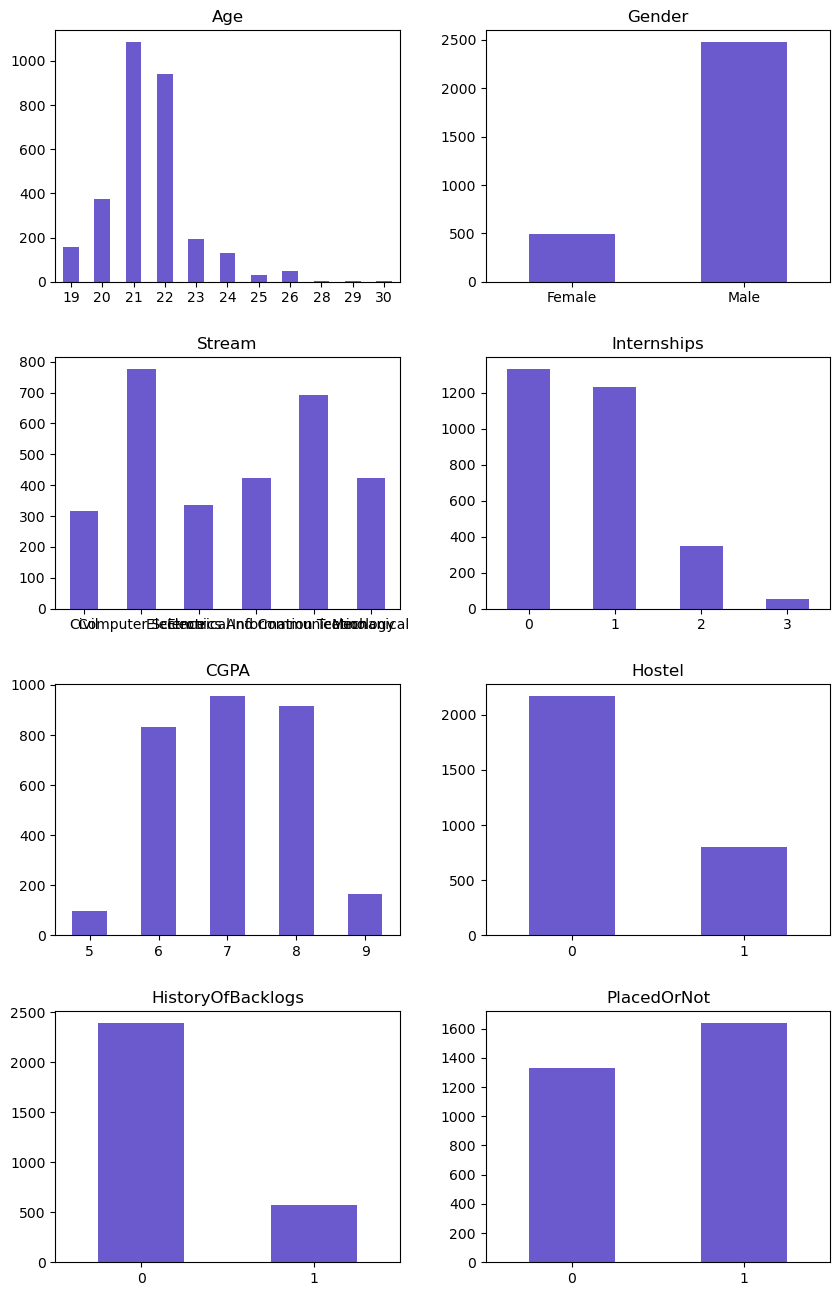

In [9]:
rsm.distr_plot(df)

<AxesSubplot: xlabel='Age'>

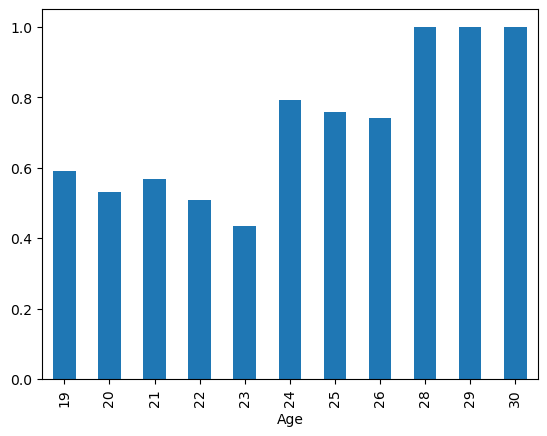

In [10]:
df.groupby('Age').mean()['PlacedOrNot'].plot.bar()

In [49]:
#convert age into three group based on the plot
import numpy as np
df['age_group'] = np.where(df['Age']<24,0,np.where(df['Age']<28,1,2))
df['age_group'] = df['age_group'].astype("category")


<AxesSubplot: xlabel='Gender'>

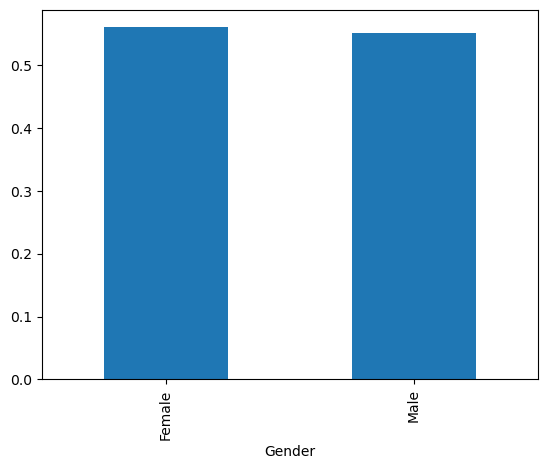

In [12]:
df.groupby('Gender').mean()['PlacedOrNot'].sort_values(ascending=False).plot.bar()

<AxesSubplot: xlabel='Stream'>

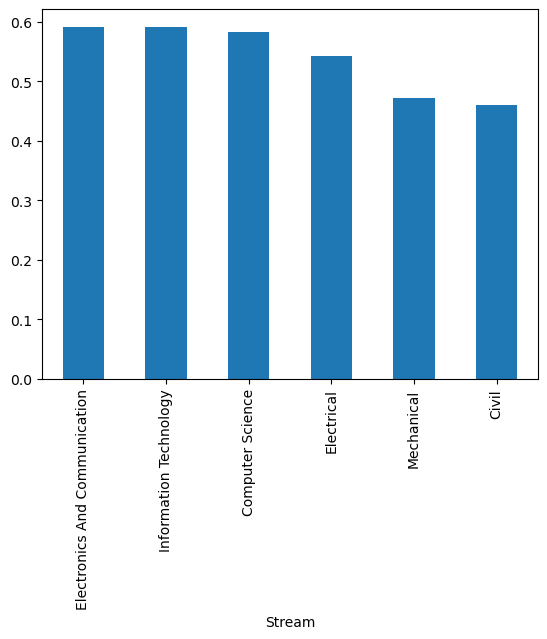

In [13]:
df.groupby('Stream').mean()['PlacedOrNot'].sort_values(ascending=False).plot.bar()

<AxesSubplot: xlabel='Internships'>

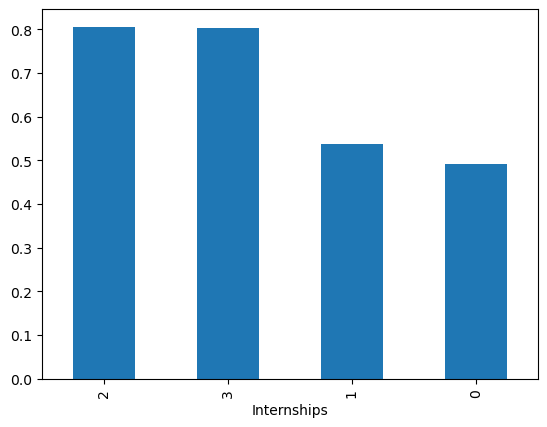

In [14]:
df.groupby('Internships').mean()['PlacedOrNot'].sort_values(ascending=False).plot.bar()

<AxesSubplot: xlabel='CGPA'>

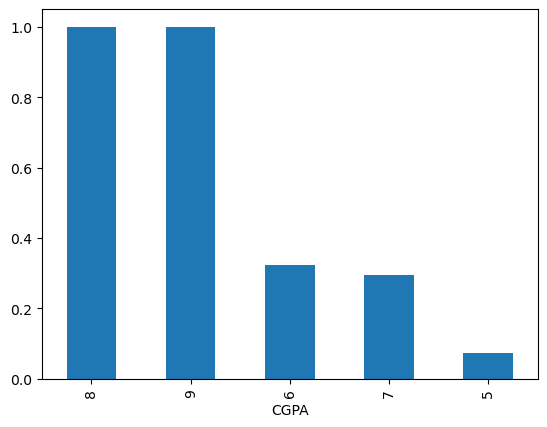

In [15]:
df.groupby('CGPA').mean()['PlacedOrNot'].sort_values(ascending=False).plot.bar()

<AxesSubplot: xlabel='Hostel'>

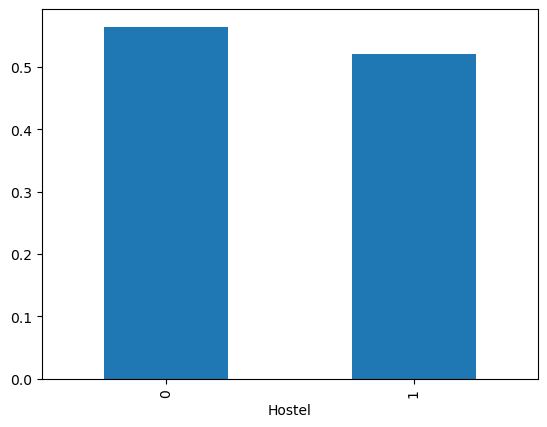

In [16]:
df.groupby('Hostel').mean()['PlacedOrNot'].sort_values(ascending=False).plot.bar()

<AxesSubplot: xlabel='HistoryOfBacklogs'>

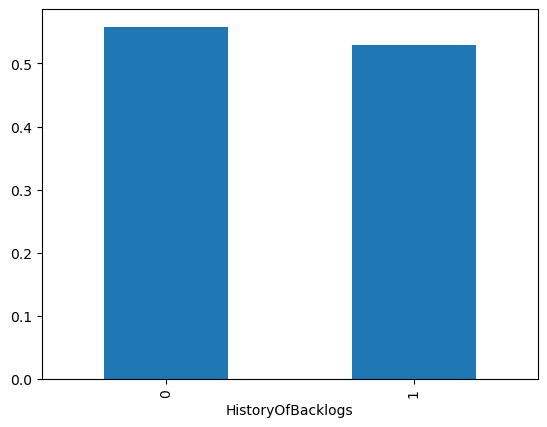

In [17]:
df.groupby('HistoryOfBacklogs').mean()['PlacedOrNot'].sort_values(ascending=False).plot.bar()

In [18]:
df = df.drop(columns=['Age'])

In [19]:
from sklearn.model_selection import train_test_split

df['Internships'] = df['Internships'].astype("category")
df['CGPA'] = df['CGPA'].astype("category")
df['Hostel'] = df['Hostel'].astype("category")
df['HistoryOfBacklogs'] = df['HistoryOfBacklogs'].astype("category")
df['PlacedOrNot'] = df['PlacedOrNot'].astype("category")
X = pd.get_dummies(df[["Gender", "Stream", "Internships","CGPA","Hostel","HistoryOfBacklogs","age_group"]], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, df['PlacedOrNot'], test_size=0.2, random_state=42)

## Model Building

### Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [21]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'max_depth': [None,2, 3, 4, 5],
              'min_samples_split': [None,2, 4, 6],
              'min_samples_leaf': [None,1, 2, 3, 4],
              'max_leaf_nodes': [None, 5, 10, 15]}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and accuracy score
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_samples_split': 4}
Accuracy: 0.8785840550743949


In [55]:
clf_t = DecisionTreeClassifier(max_depth=None,max_leaf_nodes=None,min_samples_leaf=3,min_samples_split=2)

In [56]:
clf_t.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=3)

In [57]:
y_pred = clf_t.predict(X_test)

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8754208754208754


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc = RandomForestClassifier()

In [35]:
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 4, 5, 6, None],
              'min_samples_split': [2, 4, 6, 8],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': ['auto', 'sqrt', 'log2']}

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

In [36]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=None,max_features="log2",min_samples_leaf=1,min_samples_split=6)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8754208754208754


### SVM

In [37]:
from sklearn import svm

In [50]:
sv = svm.SVC(C=10,gamma=0.1,kernel='rbf')
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8804713804713805


### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0,penalty='l2',C=5).fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8737373737373737


### MLP

In [51]:
from sklearn.neural_network import MLPClassifier

In [52]:
def nn(X, y, hlsizes=(2,2), alpha=0.1, max_iter=10000):
    return MLPClassifier(
        activation="tanh",
        solver="lbfgs",
        hidden_layer_sizes=hlsizes,
        alpha=alpha,
        random_state=1234,
        max_iter=max_iter,
    ).fit(X, y)

In [54]:
clf_nn = nn(X_train, y_train, hlsizes=(1,))
y_pred = clf_nn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8804713804713805


SVM and MLP model have better performance, I further analyze what features have high permutation importance value 

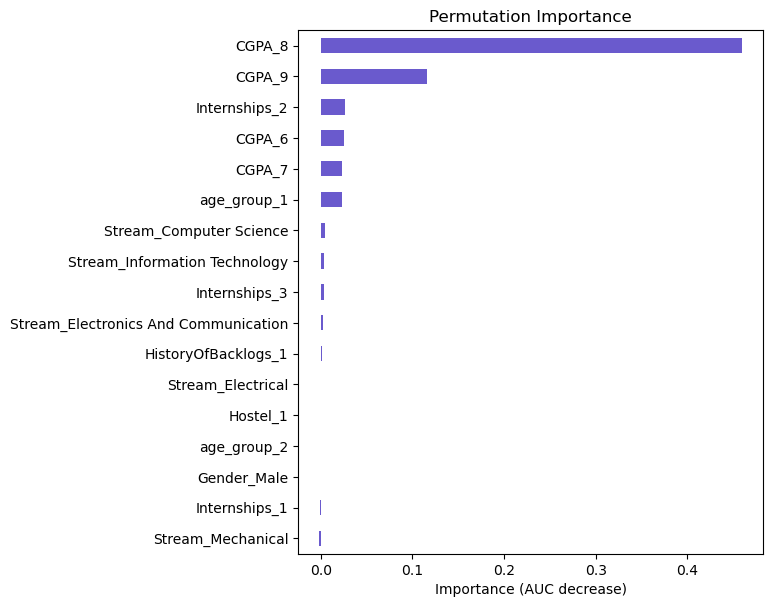

In [59]:
fig = rsm.vimp_plot_sk(clf_nn, X_train, y_train)

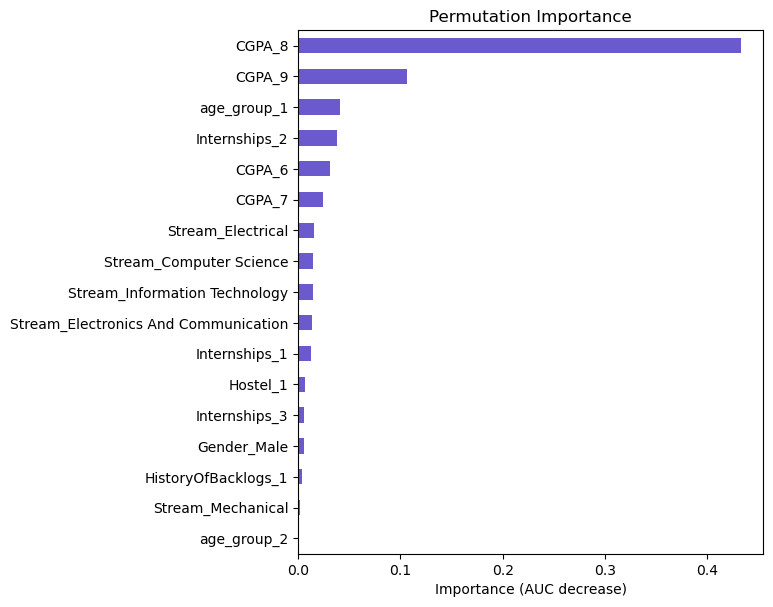

In [60]:
fig = rsm.vimp_plot_sk(sv, X_train, y_train)

As the result shows, when keeping other variable constant, CGPA equals to 8 has extremely high permutation Importance value, while other CGPA values also have strong permutation importance. Moreover, age between 24 and 26 and internship equals to 2 also have high prediction power.